Introduction
====

Determine relashionship between video game sales history by region and genre

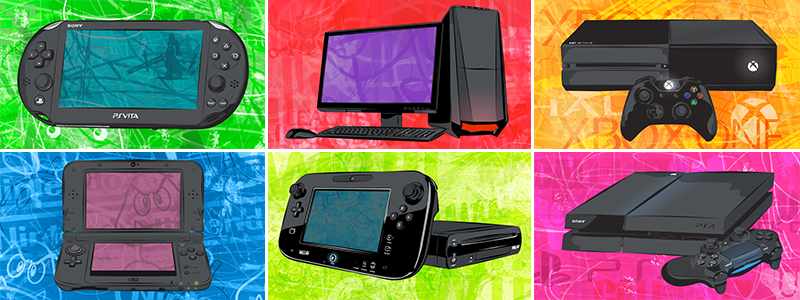

In [1]:
from IPython.display import Image
from numpy import genfromtxt, savetxt
Image(filename='video.jpg')

I picked this dataset from https://www.kaggle.com/gregorut/videogamesales

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include:

```
Rank - Ranking of overall sales
Name - The games name
Platform - Platform of the games release (i.e. PC,PS4, etc.)
Year - Year of the game's release
Genre - Genre of the game
Publisher - Publisher of the game
NA_Sales - Sales in North America (in millions)
EU_Sales - Sales in Europe (in millions)
JP_Sales - Sales in Japan (in millions)
Other_Sales - Sales in the rest of the world (in millions)
Global_Sales - Total worldwide sales.
```


In [2]:
reset -fs

**Load the required modules**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV, LinearRegression , LogisticRegression 
import statsmodels.api as sm
%matplotlib inline

**Read and summarize the data** 

In [60]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Checking to see if there is any null data

In [62]:
#Check for null values
df.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

**Checking and removing null data** 

In [63]:
#Counting
print ('Year of Release NaN:', df['Year'].isnull().sum())
print ('Publisher NaN:', df['Publisher'].isnull().sum())

#Removing
df = df.dropna()

('Year of Release NaN:', 271)
('Publisher NaN:', 58)


**Summary of the sales columns**

In [64]:
df.loc[:,'NA_Sales':'Global_Sales'].describe()
#based on stats report NA is the best game sales selling region.

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [66]:
#df_small['Year'] = df_small['Year'].astype(object)
df['Year'] = df['Year'].astype(object)

**Dummy variable creation for the model**

In [67]:
df = pd.get_dummies(df)

In [68]:
df.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_'98 Koshien,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1,41.49,29.02,3.77,8.46,82.74,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,29.08,3.58,6.81,0.77,40.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,15.85,12.88,3.79,3.31,35.82,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15.75,11.01,3.28,2.96,33.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,11.27,8.89,10.22,1.00,31.37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Model: linear regression**

In [71]:
#Load Train and Test datasets

x_train= df.iloc[:,6:]
y_train= df.loc[:,"Global_Sales"]
x_test= df.iloc[2000:3000,6:]
df.iloc[2000:3000,].head()
#https://fabsta.github.io/programming/pandas-cheat-sheet/

In [73]:
# Create linear regression object
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

In [80]:
# Train the model using the training sets and check score
linear.fit(x_train, y_train)
score = linear.score(x_train, y_train)
print "The accuracy score of the model is: %f " %score

The accuracy score of the model is: 0.749082 


In [77]:
#Equation coefficient and Intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
#Predict Output
predicted= linear.predict(x_test)

('Coefficient: \n', array([ -6.76059190e+13,  -3.01929159e+13,   3.47353574e+13, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00]))
('Intercept: \n', -5774906357785.1836)


**GLM model** 

In [110]:
from patsy import dmatrices

In [111]:
y, X = dmatrices('Global_Sales ~ Name + Platform+ Year + Genre + Publisher', data=df, return_type='dataframe')

In [112]:
mod = sm.OLS(y, X) 
res = mod.fit() 
res.summary() 

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     30.32
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           6.09e-10
Time:                        14:16:42   Log-Likelihood:                -120.38
No. Observations:                 200   AIC:                             608.8
Df Residuals:                      16   BIC:                             1216.
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------

In [113]:
sm.stats.linear_rainbow(res)


(0.50609185466636097, 0.91132400715908413)

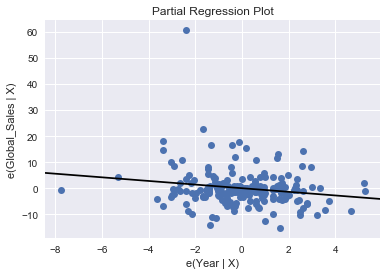

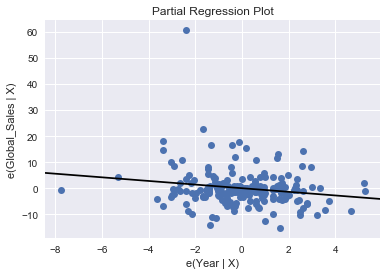

In [115]:
sm.graphics.plot_partregress('Global_Sales', 'Year', ['Genre', 'Platform'],
   ....:                              data=df3, obs_labels=False)

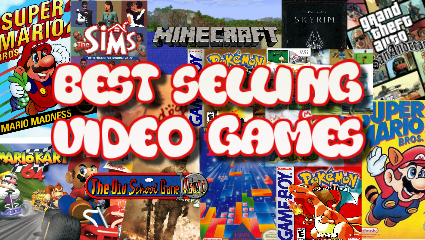

In [3]:
Image(filename='best.jpg')

In [13]:
#Top 20 best-selling video games by global sales copies
df.groupby(['Name']).sum()['Global_Sales'].sort_values(ascending=False)[:20]
#cited http://stackoverflow.com/questions/15322632/python-pandas-df-groupby-agg-column-reference-in-agg

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.72
Call of Duty: Black Ops           29.40
Wii Play                          29.02
New Super Mario Bros. Wii         28.62
Duck Hunt                         28.31
Call of Duty: Ghosts              27.38
Super Mario World                 26.07
Call of Duty: Black Ops 3         25.32
Call of Duty: Modern Warfare 2    25.09
Nintendogs                        24.76
Grand Theft Auto: San Andreas     23.86
Name: Global_Sales, dtype: float64

**Plots** 

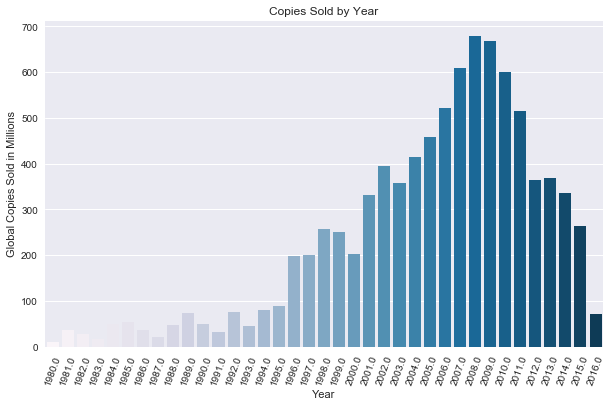

In [14]:
#Plotting sales copies by year
global_sales_by_year = df[df['Year'] <= 2016.0].groupby(['Year']).sum()['Global_Sales']
plt.figure(figsize=(10,6))
sns.barplot(y = global_sales_by_year.values, x = global_sales_by_year.index, palette = "PuBu")
#cited from http://seaborn.pydata.org/tutorial/color_palettes.html
plt.xticks(rotation = 70)
#http://stackoverflow.com/questions/19427188/understanding-matplotlib-xticks-syntax
plt.title('Copies Sold by Year')
plt.ylabel('Global Copies Sold in Millions')
plt.xlabel('Year')
plt.show()

#NA and EU and Other sales have similar pattern however JP has different pattern then others

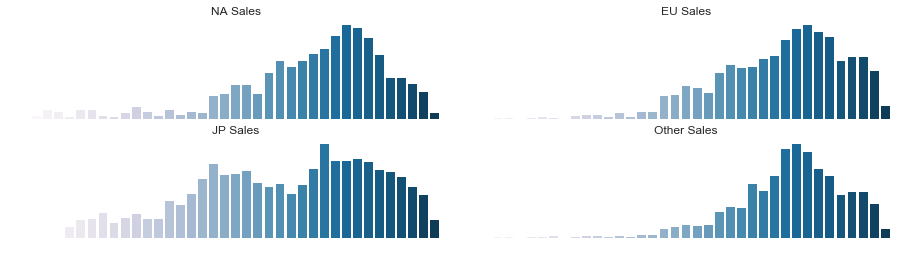

In [16]:
NA_sales_by_year = df[df['Year'] <= 2016.0].groupby(['Year']).sum()['NA_Sales']
EU_sales_by_year = df[df['Year'] <= 2016.0].groupby(['Year']).sum()['EU_Sales']
JP_sales_by_year = df[df['Year'] <= 2016.0].groupby(['Year']).sum()['JP_Sales']
other_sales_by_year = df[df['Year'] <= 2016.0].groupby(['Year']).sum()['Other_Sales']

the_grid = GridSpec(2, 2)
the_grid.update(left=.01, right=2, wspace=0.1)

plt.subplot(the_grid[0, 0])
sns.barplot(y = NA_sales_by_year.values, x = NA_sales_by_year.index, palette = "PuBu")
plt.title('NA Sales')
plt.axis('off')

plt.subplot(the_grid[0, 1])
sns.barplot(y = EU_sales_by_year.values, x = EU_sales_by_year.index, palette = "PuBu")
plt.title('EU Sales')
plt.axis('off')

plt.subplot(the_grid[1, 0])
sns.barplot(y = JP_sales_by_year.values, x = JP_sales_by_year.index, palette = "PuBu")
plt.title('JP Sales')
plt.axis('off')

plt.subplot(the_grid[1, 1])
sns.barplot(y = other_sales_by_year.values, x = other_sales_by_year.index, palette = "PuBu")
plt.title('Other Sales')
plt.axis('off')

plt.show()

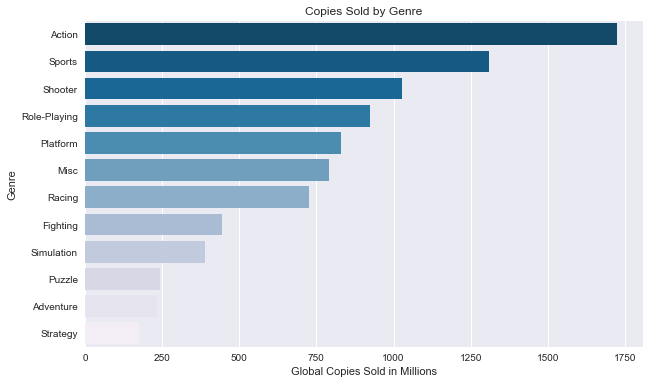

In [18]:
#Plotting global sales copies by genre
sales_by_genre = df.groupby(['Genre']).sum()['Global_Sales'].sort_values(ascending = False)
#http://stackoverflow.com/questions/15322632/python-pandas-df-groupby-agg-column-reference-in-agg
plt.figure(figsize=(10,6))
sns.barplot(y = sales_by_genre.index, x = sales_by_genre.values, palette = "PuBu_r")
plt.title('Copies Sold by Genre')
plt.xlabel('Global Copies Sold in Millions')
plt.ylabel('Genre')
plt.show()

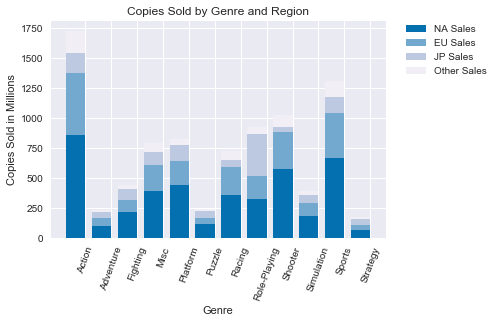

In [19]:
#Coplies Sold by Genre and Region
NA_sales_by_genre = df.groupby(['Genre']).sum()['NA_Sales']
EU_sales_by_genre = df.groupby(['Genre']).sum()['EU_Sales']
JP_sales_by_genre = df.groupby(['Genre']).sum()['JP_Sales']
other_sales_by_genre = df.groupby(['Genre']).sum()['Other_Sales']

N = 12
ind = np.arange(N)
width = 0.75

NA_sales_plot = plt.bar(ind,NA_sales_by_genre.values, width, color = '#0570b0', label = "NA Sales")
EU_sales_plot = plt.bar(ind,EU_sales_by_genre.values, width, bottom = NA_sales_by_genre.values, color = '#74a9cf', label = "EU Sales")
JP_sale_plot = plt.bar(ind,JP_sales_by_genre.values, width, bottom = EU_sales_by_genre.values + NA_sales_by_genre.values, color = '#bdc9e1', label = "JP Sales")
other_sales_plot = plt.bar(ind,other_sales_by_genre.values, width, bottom = JP_sales_by_genre.values + EU_sales_by_genre.values + NA_sales_by_genre.values, color = '#f1eef6', label = "Other Sales")
#http://stackoverflow.com/questions/40319743/plotting-a-bar-graph-in-python-with-matplotlib-pyplot

plt.xticks(ind + width/2., NA_sales_by_genre.index, rotation = 70)
plt.title('Copies Sold by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Copies Sold in Millions')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
#http://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-most-simple-manner-possible
plt.show()

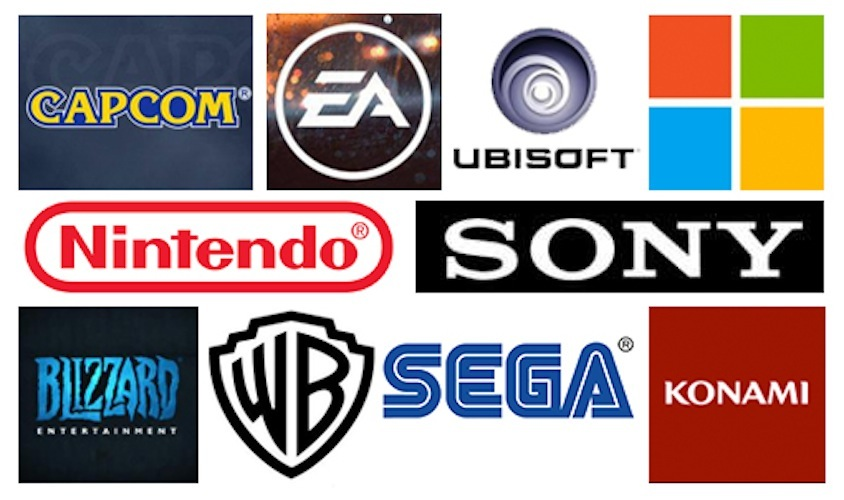

In [2]:
Image(filename='publisher.jpg')

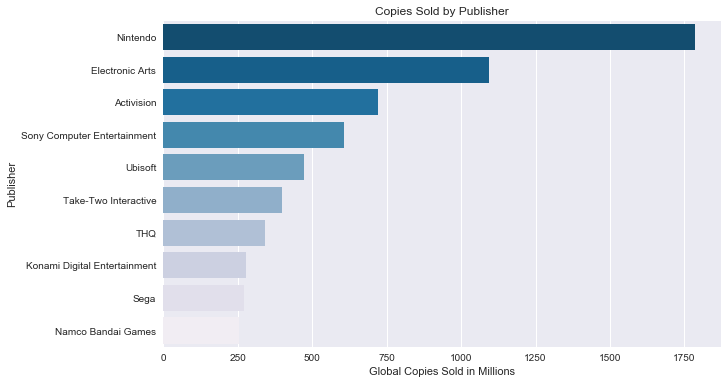

In [20]:
#Plotting top 10 publishers by sales copies
sales_by_publisher = df.groupby(['Publisher']).sum()['Global_Sales'].sort_values(ascending = False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(y = sales_by_publisher.index, x = sales_by_publisher.values, palette = "PuBu_r")
plt.title('Copies Sold by Publisher')
plt.xlabel('Global Copies Sold in Millions')
plt.ylabel('Publisher')
plt.show()

# Conclusion


According to the dataset I could assume that similar game type repeatly stay in high rank and three popular game genres are Action, Sports, and Shooting game.  North America and Europe share similar top-selling game genres however Japan has different top-selling games so we could tell they have different game cultures by region. Also it can tell you that gaming sales is significantly decreasing from 2008.  

